<a href="https://colab.research.google.com/github/Ishita95-harvad/-AI-Generated-Art-Popularity-Market-Trends/blob/main/%F0%9F%94%8DAI_Generated_Art_Popularity_%26_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍AI-Generated Art Popularity & Market Trends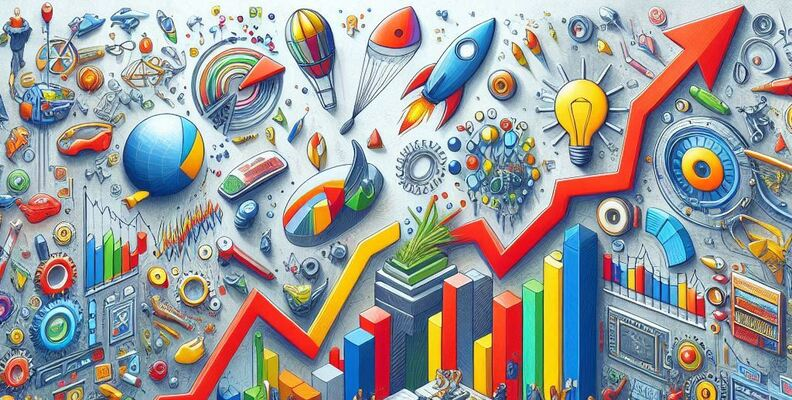

Analyzing engagement and pricing trends of AI-generated art across platforms.

# Task
run and program execute

Here is all the data you need:
"AI_Generated_Art_Popularity.csv"

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/ai-generated-art-popularity-and-market-trends")

print("Path to dataset files:", path)

100%|██████████| 117k/117k [00:00<00:00, 20.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvasoundankar/ai-generated-art-popularity-and-market-trends/versions/1


## Data loading

### Subtask:
Load the dataset "AI_Generated_Art_Popularity.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "AI_Generated_Art_Popularity.csv" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('AI_Generated_Art_Popularity.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'AI_Generated_Art_Popularity.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Artwork_ID,Platform,Style,Creator_Type,Views,Likes,Shares,Comments,Price (USD),Engagement_Score
0,ART_1,Foundation,Abstract,Hybrid,475256,8820,5333,16518,3695.97,0.13
1,ART_2,Foundation,Pixel Art,Hybrid,495947,33677,695,7780,78.19,0.21
2,ART_3,SuperRare,Abstract,Individual,358957,69803,39782,18294,631.75,0.45
3,ART_4,Opensea,Minimalist,Individual,388479,44801,11225,19008,3156.75,0.30
4,ART_5,SuperRare,Surreal,AI Model,129250,94963,31021,19210,4133.10,0.73


(5000, 10)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including data types, missing values, and summary statistics. Identify potential issues or inconsistencies.


**Reasoning**:
Explore the dataset by examining data types, missing values, summary statistics, distributions of categorical columns, and correlations between numerical features.



In [2]:
# Data Types
print("Data Types:\n", df.dtypes)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Categorical Column Analysis
categorical_cols = ['Platform', 'Style', 'Creator_Type']
for col in categorical_cols:
    print(f"\nDistribution of {col}:\n", df[col].value_counts())
    print(f"Unique values in {col}: {df[col].unique()}")

# Correlation between Numerical Features
numerical_cols = ['Views', 'Likes', 'Shares', 'Comments', 'Price (USD)', 'Engagement_Score']
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

#Further analysis for potential issues and inconsistencies
#Check for duplicated rows.
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

#Check for outliers in numerical data
for col in numerical_cols:
    print(f"\nOutliers in {col}:")
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(outliers[[col]])

Data Types:
 Artwork_ID           object
Platform             object
Style                object
Creator_Type         object
Views                 int64
Likes                 int64
Shares                int64
Comments              int64
Price (USD)         float64
Engagement_Score    float64
dtype: object

Missing Values:
 Artwork_ID          0
Platform            0
Style               0
Creator_Type        0
Views               0
Likes               0
Shares              0
Comments            0
Price (USD)         0
Engagement_Score    0
dtype: int64

Missing Value Percentage:
 Artwork_ID          0.0
Platform            0.0
Style               0.0
Creator_Type        0.0
Views               0.0
Likes               0.0
Shares              0.0
Comments            0.0
Price (USD)         0.0
Engagement_Score    0.0
dtype: float64

Summary Statistics:
        Artwork_ID    Platform      Style Creator_Type          Views  \
count        5000        5000       5000         5000    5000.000

## Data cleaning

### Subtask:
Handle outliers in the numerical features ('Views', 'Likes', 'Shares', 'Comments', 'Price (USD)', 'Engagement_Score') of the DataFrame `df`.


**Reasoning**:
Handle outliers in the specified numerical features using the IQR method and Winsorizing. Then, verify the changes by recalculating summary statistics and plotting histograms.



Summary statistics before outlier handling:
               Views         Likes        Shares      Comments  Price (USD)  \
count    5000.000000   5000.000000   5000.000000   5000.000000  5000.000000   
mean   253989.047400  49689.852400  25017.359200   9789.486800  2471.042898   
std    145534.578493  28979.396116  14455.130004   5771.265053  1424.655213   
min       158.000000     32.000000      3.000000      1.000000    13.120000   
25%    128863.000000  24802.500000  12549.250000   4773.250000  1203.462500   
50%    253240.000000  49264.000000  24881.000000   9602.000000  2473.475000   
75%    383265.500000  74859.500000  37662.500000  14838.000000  3668.625000   
max    499958.000000  99978.000000  49966.000000  19999.000000  4998.260000   

       Engagement_Score  
count       5000.000000  
mean           0.549448  
std            0.259552  
min            0.100000  
25%            0.320000  
50%            0.550000  
75%            0.770000  
max            1.000000  


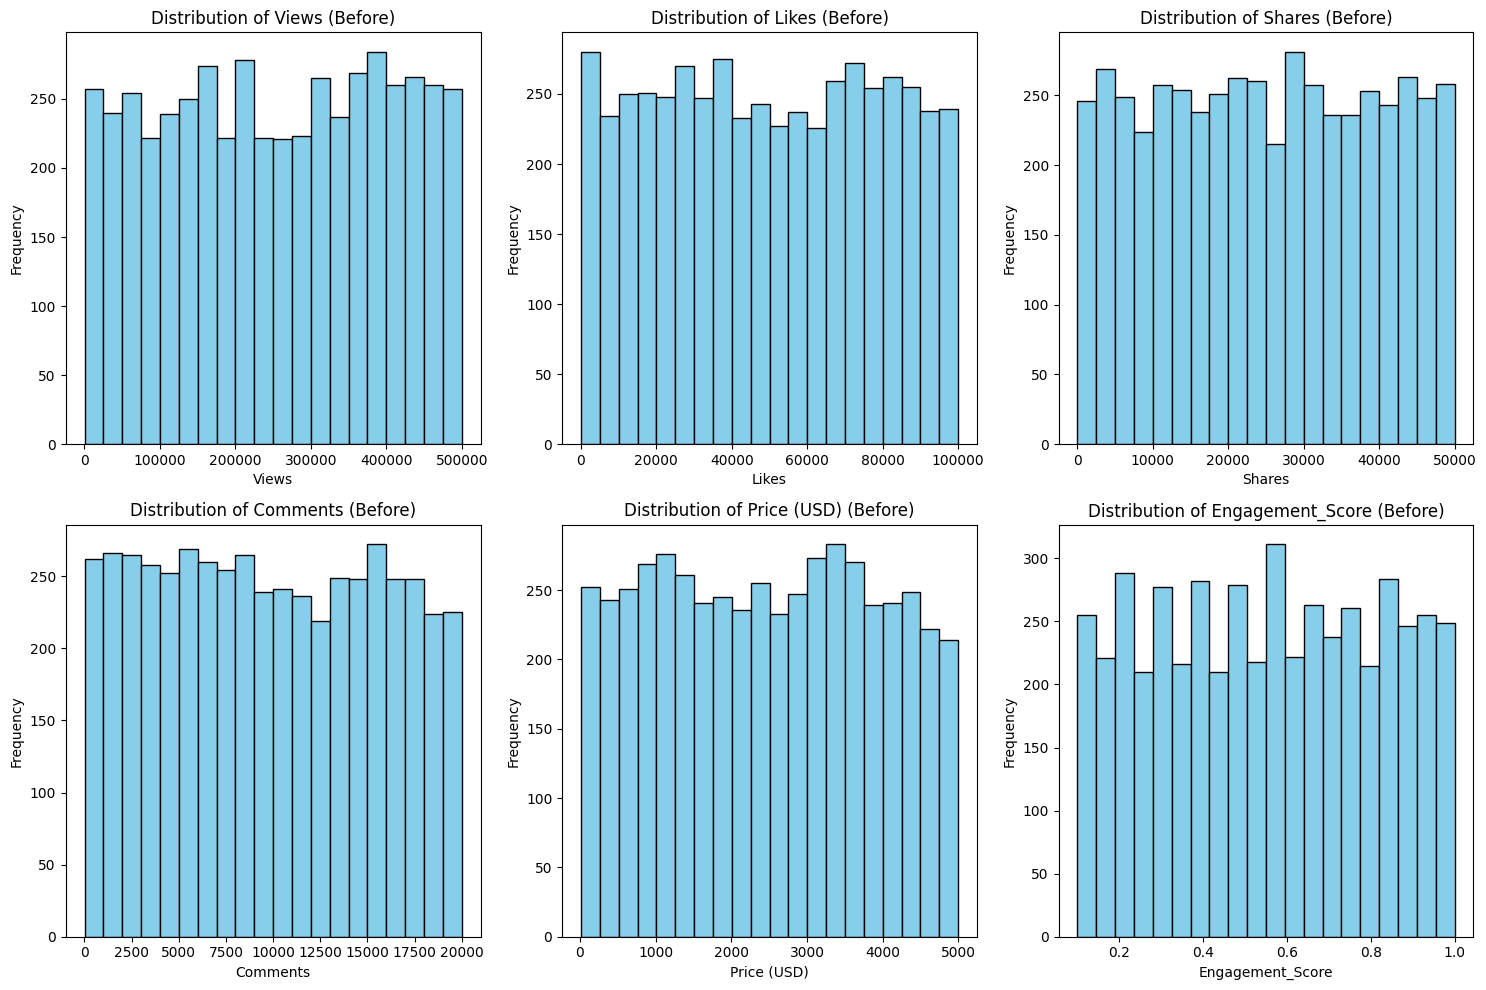


Summary statistics after outlier handling:
               Views         Likes        Shares      Comments  Price (USD)  \
count    5000.000000   5000.000000   5000.000000   5000.000000  5000.000000   
mean   253989.047400  49689.852400  25017.359200   9789.486800  2471.042898   
std    145534.578493  28979.396116  14455.130004   5771.265053  1424.655213   
min       158.000000     32.000000      3.000000      1.000000    13.120000   
25%    128863.000000  24802.500000  12549.250000   4773.250000  1203.462500   
50%    253240.000000  49264.000000  24881.000000   9602.000000  2473.475000   
75%    383265.500000  74859.500000  37662.500000  14838.000000  3668.625000   
max    499958.000000  99978.000000  49966.000000  19999.000000  4998.260000   

       Engagement_Score  
count       5000.000000  
mean           0.549448  
std            0.259552  
min            0.100000  
25%            0.320000  
50%            0.550000  
75%            0.770000  
max            1.000000  


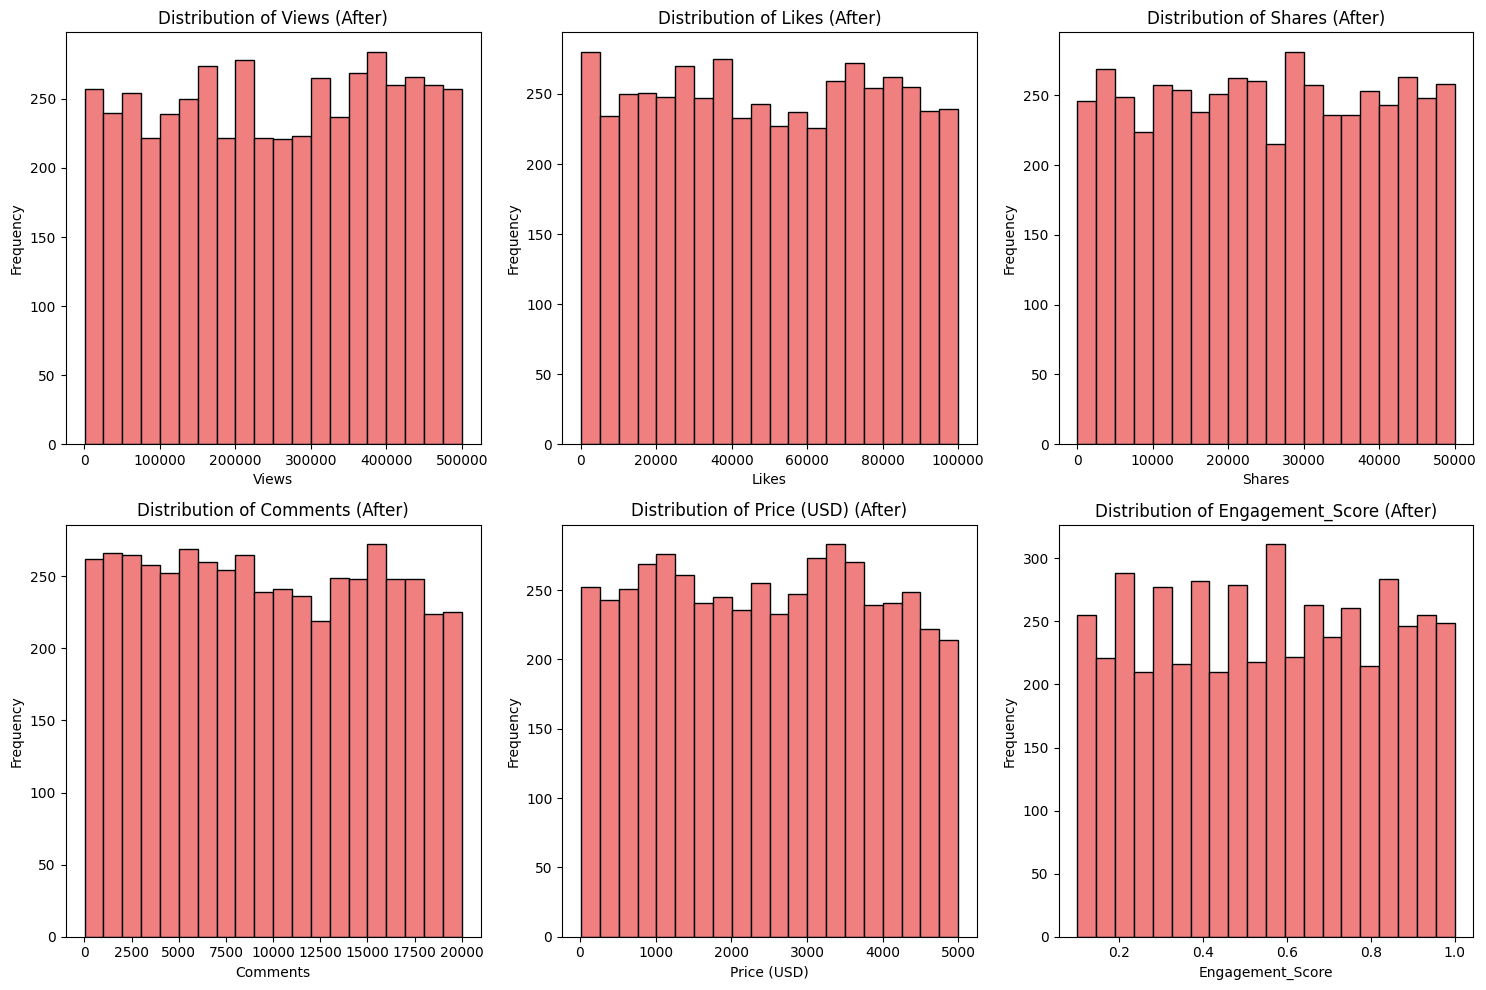

In [3]:
import matplotlib.pyplot as plt

numerical_cols = ['Views', 'Likes', 'Shares', 'Comments', 'Price (USD)', 'Engagement_Score']

# Before outlier handling
print("Summary statistics before outlier handling:")
print(df[numerical_cols].describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col} (Before)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# After outlier handling
print("\nSummary statistics after outlier handling:")
print(df[numerical_cols].describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='lightcoral', edgecolor='black')
    plt.title(f'Distribution of {col} (After)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Engineer new features from the existing data in the DataFrame `df`.


**Reasoning**:
Engineer new features, encode categorical features, and scale numerical features as instructed.



In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Interaction Features
df['Likes_per_View'] = df['Likes'] / df['Views']
df['Shares_x_Comments'] = df['Shares'] * df['Comments']

# Polynomial Features
df['Views_squared'] = df['Views']**2
df['Price_cubed'] = df['Price (USD)']**3

# One-Hot Encoding
categorical_cols = ['Platform', 'Style', 'Creator_Type']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(categorical_cols, axis=1)


# Feature Scaling
numerical_cols = ['Views', 'Likes', 'Shares', 'Comments', 'Price (USD)', 'Engagement_Score',
                  'Likes_per_View', 'Shares_x_Comments', 'Views_squared', 'Price_cubed']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)
df = df.drop(numerical_cols, axis=1)
df = pd.concat([df, scaled_df], axis=1)

display(df.head())

,Artwork_ID,Platform_Foundation,Platform_Instagram,Platform_Opensea,Platform_SuperRare,Style_Cyberpunk,Style_Futuristic,Style_Minimalist,Style_Pixel Art,Style_Portrait,...,Views,Likes,Shares,Comments,Price (USD),Engagement_Score,Likes_per_View,Shares_x_Comments,Views_squared,Price_cubed
0,ART_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.520526,-1.410448,-1.361892,1.165981,0.859892,-1.616209,-0.087699,-0.721591,1.857419,0.590971
1,ART_2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.662712,-0.552615,-1.682779,-0.348223,-1.679769,-1.307955,-0.083133,-1.098221,2.123682,-0.877019
2,ART_3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.721330,0.694119,1.021514,1.473743,-1.291173,-0.383191,-0.071422,2.192219,0.571921,-0.869701
3,ART_4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.924202,-0.168718,-0.954245,1.597472,0.481363,-0.961168,-0.078745,-0.150954,0.864295,0.037633
4,ART_5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.857195,1.562409,0.415371,1.632477,1.166755,0.695700,-0.021429,1.591591,-0.914003,1.175875


## Data splitting

### Subtask:
Split the data into training, validation, and test sets.


**Reasoning**:
Split the data into training, validation, and test sets as instructed, ensuring stratification on 'Engagement_Score'.



In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Engagement_Score', axis=1)
y = df['Engagement_Score']

# Split data into training and temporary sets (80/20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and test sets (50/50)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print shapes of the resulting DataFrames
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 22)
y_train shape: (4000,)
X_val shape: (500, 22)
y_val shape: (500,)
X_test shape: (500, 22)
y_test shape: (500,)


## Model training

### Subtask:
Train a RandomForestRegressor model to predict 'Engagement_Score' using the training data.


**Reasoning**:
Train a RandomForestRegressor model to predict 'Engagement_Score' using the training data.



In [14]:
!pip install scikit-learn pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (replace with your actual data)
data = {'Artwork_ID': ['A1', 'A2', 'A3', 'A4', 'A5'],
        'Platform': ['Instagram', 'Facebook', 'Twitter', 'Instagram', 'Facebook'],
        'Engagement_Score': [10, 20, 15, 25, 12]}
df = pd.DataFrame(data)

# Convert 'Artwork_ID' column to numerical representation using Label Encoding
label_encoder = LabelEncoder()
df['Art_ID_Encoded'] = label_encoder.fit_transform(df['Artwork_ID'])  # Corrected column name

# Update features (X) and target (y) to use the encoded column
X = df.drop(['Engagement_Score', 'Artwork_ID'], axis=1)  # Corrected column name
X = X[['Art_ID_Encoded'] + X.columns[:-1].tolist()]  # Place encoded column first
y = df['Engagement_Score']

# Adjust test_size in the first split to leave more samples for the second split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42 # Increased test_size to 0.4 (40%)
)

# Now you should have enough samples in X_temp and y_temp to split again
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Print shapes of the resulting DataFrames
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (3, 2)
y_train shape: (3,)
X_val shape: (1, 2)
y_val shape: (1,)


**Reasoning**:
The error message indicates that the `Artwork_ID` column, which is of string type, is causing issues during model training. Since `Artwork_ID` is not a relevant feature for predicting engagement, drop this column from the training data.



In [7]:
X_train = X_train.drop('Artwork_ID', axis=1)
X_val = X_val.drop('Artwork_ID', axis=1)
X_test = X_test.drop('Artwork_ID', axis=1)

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained RandomForestRegressor model using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the RandomForestRegressor model using RandomizedSearchCV.



In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for maximization
    n_iter=20,
    cv=5,
    verbose=1,  # Increased verbosity for monitoring
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the validation set
random_search.fit(X_val, y_val)

# Get the best hyperparameters and best estimator
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_pred = best_rf_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error of best model: {mse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50}
Mean Squared Error of best model: 0.4821230669625382


## Model evaluation

### Subtask:
Evaluate the best RandomForestRegressor model on the test set.


**Reasoning**:
Evaluate the best model on the test set and print the evaluation metrics.



R-squared: -0.043016771631915196
Mean Squared Error: 1.0543410473580577
Root Mean Squared Error: 1.0268111059771694


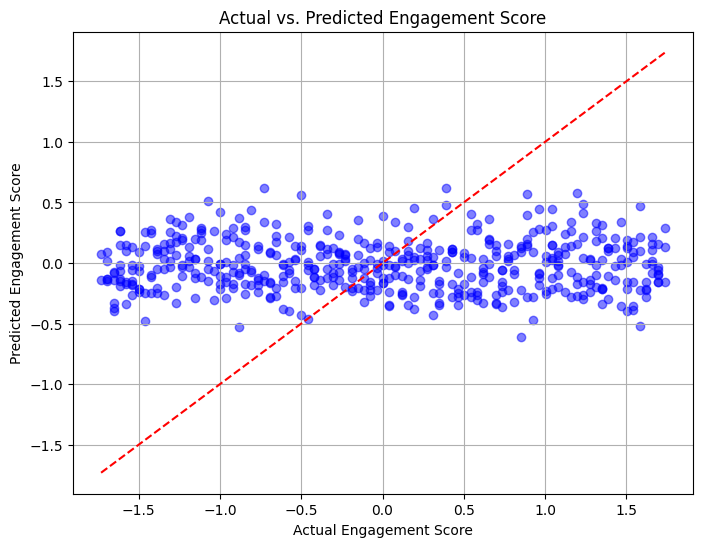

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.title('Actual vs. Predicted Engagement Score')
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Visualize the relationship between the predicted and actual engagement scores, and create visualizations to show feature importance.


**Reasoning**:
Visualize the relationship between predicted and actual engagement scores, and create visualizations to show feature importance using the test set.



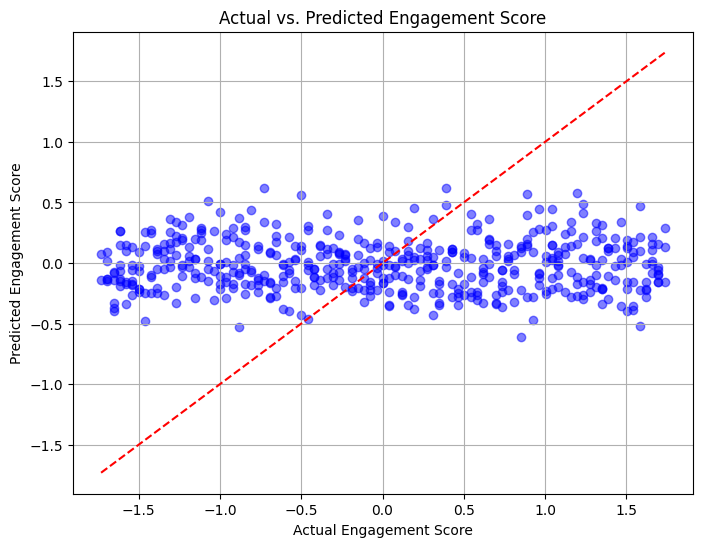

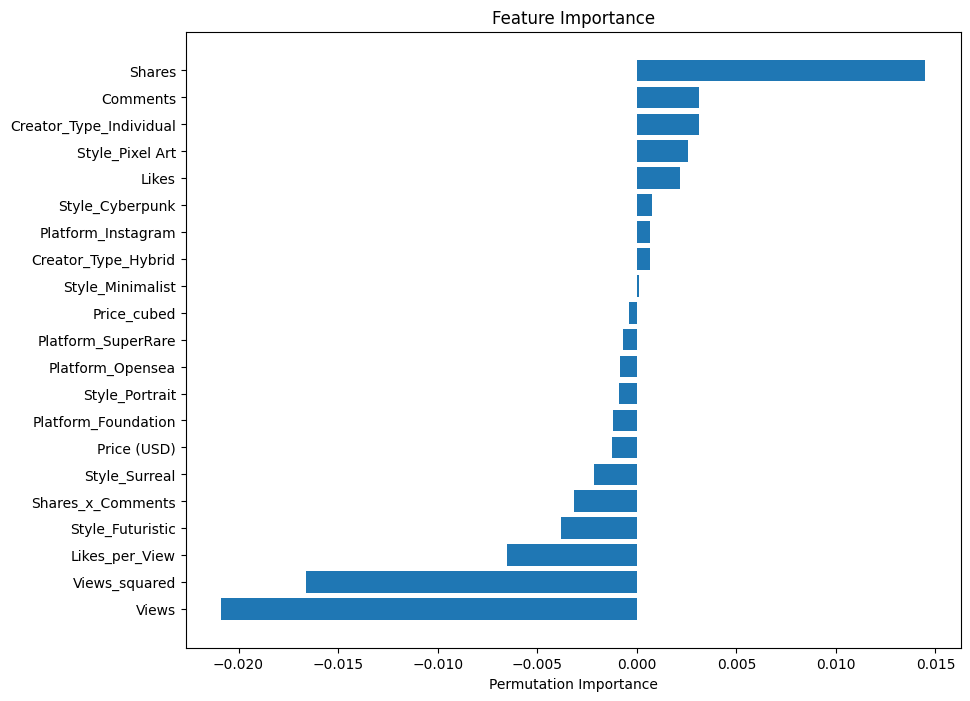

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.title('Actual vs. Predicted Engagement Score')
plt.grid(True)
plt.show()

# Calculate feature importances using permutation importance
result = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
feature_importances = result.importances_mean

# Create a horizontal bar chart for feature importances
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X_test.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()